<a href="https://colab.research.google.com/github/tuananhnguyen512/AI2023_class/blob/main/5kindsofflowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import các thư viện
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#load file ảnh từ ggdrive đặt tên 
folder = '/content/drive/MyDrive/Picture/Flowers/'
photos, labels = list(), list()

In [ ]:
#gán nhãn cho các giá trị hoa
for file in listdir(folder):
  output = 0.0
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('dandelion'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sunflower'):
    output = 4.0 
  if file.startswith('tulip'):
    output = 5.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(7654, 50, 50, 3) (7654,)


In [ ]:
#lưu dữ liệu sau khi đã sử lí vào ggdrive
save('/content/drive/MyDrive/Pic_train/Flowers_photos.npy', photos)
save('/content/drive/MyDrive/Pic_train/Flowers_labels.npy', labels)

In [ ]:
#lấy dữ liệu để sử dụng
photos = np.load('/content/drive/MyDrive/Pic_train/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/Pic_train/Flowers_labels.npy')

In [ ]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=6)

In [ ]:
# Import các thư viên
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [ ]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6, activation='softmax'))

In [ ]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 100, epochs = 45, verbose = 1)

Epoch 1/45
77/77 [==============================] - 10s 15ms/step - loss: 1.1857 - accuracy: 0.5042
Epoch 2/45
77/77 [==============================] - 1s 12ms/step - loss: 0.9203 - accuracy: 0.6316
Epoch 3/45
77/77 [==============================] - 1s 14ms/step - loss: 0.7680 - accuracy: 0.6987
Epoch 4/45
77/77 [==============================] - 1s 14ms/step - loss: 0.6549 - accuracy: 0.7519
Epoch 5/45
77/77 [==============================] - 1s 12ms/step - loss: 0.5181 - accuracy: 0.8074
Epoch 6/45
77/77 [==============================] - 1s 11ms/step - loss: 0.3706 - accuracy: 0.8660
Epoch 7/45
77/77 [==============================] - 1s 11ms/step - loss: 0.2419 - accuracy: 0.9220
Epoch 8/45
77/77 [==============================] - 1s 11ms/step - loss: 0.1568 - accuracy: 0.9539
Epoch 9/45
77/77 [==============================] - 1s 11ms/step - loss: 0.0643 - accuracy: 0.9867
Epoch 10/45
77/77 [==============================] - 1s 11ms/step - loss: 0.0326 - accuracy: 0.9954
Epoch 11

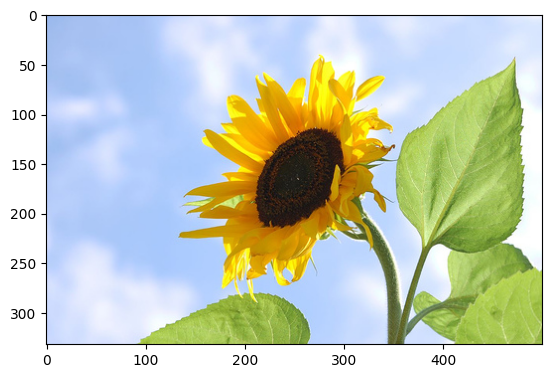

1/1 [==============================] - 0s 87ms/step
4
Hoa:  Sunflower


In [ ]:
image = Image.open('/content/drive/MyDrive/Pic_test/flower_test/14.jpg')

# chỉnh ảnh về kích thước mong muốn
IMG = image
image = image.resize((50, 50))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
image = np.asarray(image)
image = image.reshape(1,50,50,3)
image = image.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(image), axis=-1)
class_names = ["khong biet", "Daisy","Dandelion","Rose","Sunflower","Tulip"]
temp1 = matrix[0]
print(temp1)
print("Hoa: ", class_names[temp1])

In [ ]:
model.save('/content/drive/MyDrive/Model_Trained/Flower_train.h5')